<h1 style= "color: red"> Bivariate and Multivariate Analysis on Famous Datasets </h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load All Datasets

In [3]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [4]:
titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1) Scatterplot (Numeric - Numeric)

In [7]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

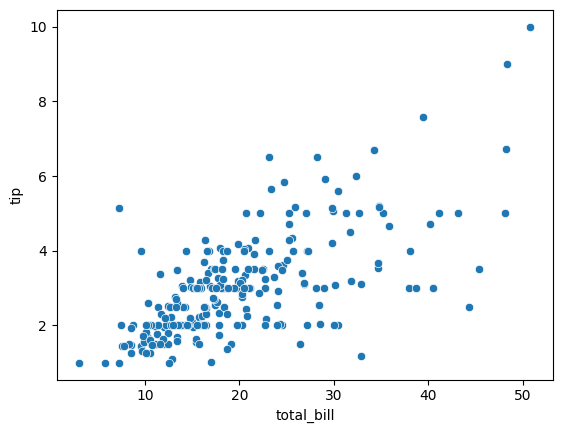

In [8]:
# Bivariate Analysis
sns.scatterplot(x ='total_bill',y = 'tip',data = tips)
plt.show()

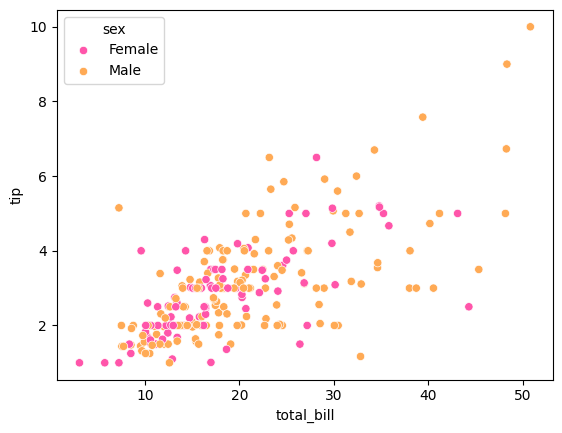

In [9]:
# Multivariate Analysis (3 Columns)
sns.scatterplot(x ='total_bill',y = 'tip',hue = 'sex',palette = 'spring',data = tips)
plt.show()

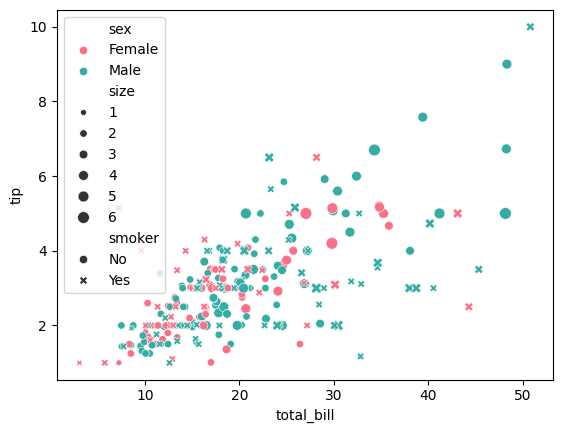

In [10]:
# Multivariate Analysis (5 Columns)
sns.scatterplot(x ='total_bill',y = 'tip',hue = 'sex',style = 'smoker',size = 'size',palette = 'husl',data = tips)
plt.show()

# 2) Bar Plot (Numeric - Categorical)

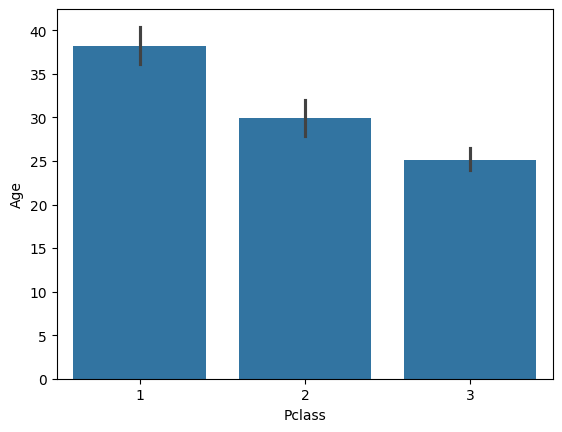

In [11]:
# Bivariate Analysis
sns.barplot(x = 'Pclass',y = 'Age',data = titanic)
plt.show()

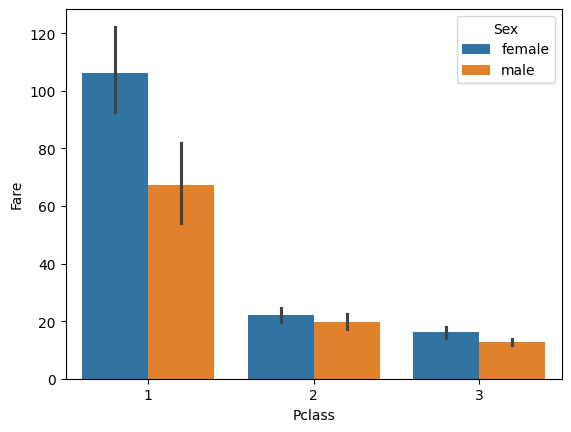

In [12]:
# Multivariate Analysis
sns.barplot(x = 'Pclass',y = 'Fare',hue = "Sex",data = titanic)
plt.show()

# 3) Box Plot (Numeric - Categorical)

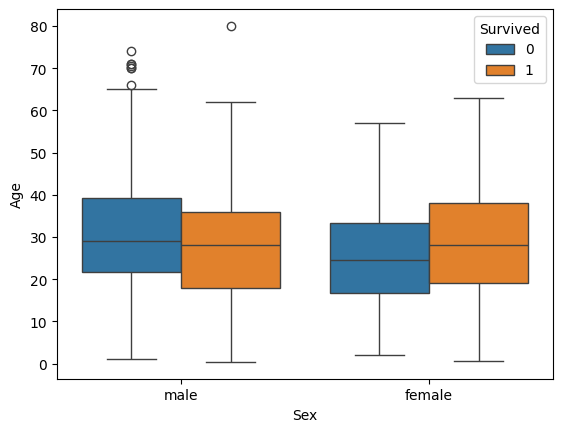

In [13]:
sns.boxplot(x = 'Sex',y = 'Age',hue = 'Survived',data = titanic)
plt.show()

# 4) Displot (Numeric - Categorical)

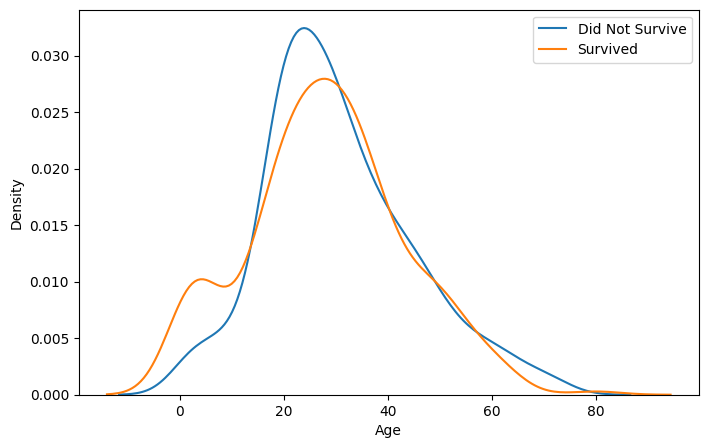

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=titanic[titanic['Survived']==0],
    x="Age",
    label = "Did Not Survive"   
)
sns.kdeplot(
    data=titanic[titanic['Survived']==1],
    x="Age",
    label = "Survived"   
)
plt.legend()
plt.show()

# 5) Heatmap (Categorical - Categorical)

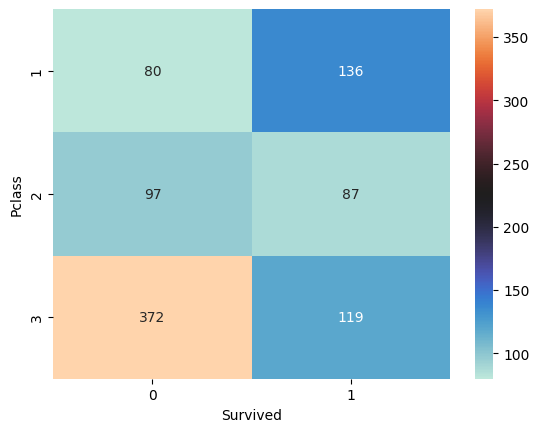

In [15]:
ct = pd.crosstab(titanic['Pclass'],titanic['Survived'])
sns.heatmap(ct,cmap= "icefire",annot = True,fmt = 'd')
plt.show()

<Axes: xlabel='Pclass'>

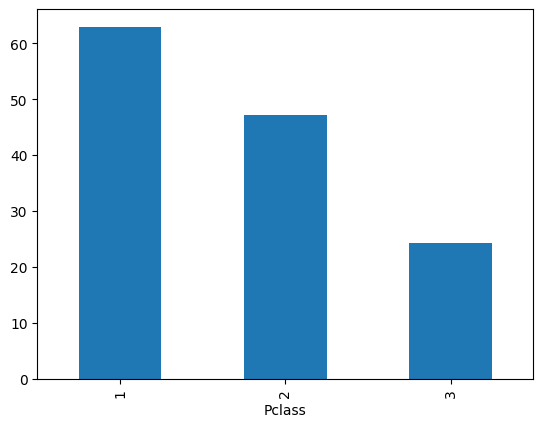

In [16]:
(titanic.groupby('Pclass')['Survived'].mean()*100).plot(kind = 'bar')

In [17]:
titanic.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

# 6) ClusterMap (Categorical - Catgorical)

In [18]:
x = pd.crosstab(titanic['Parch'],titanic['Survived'])
x

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


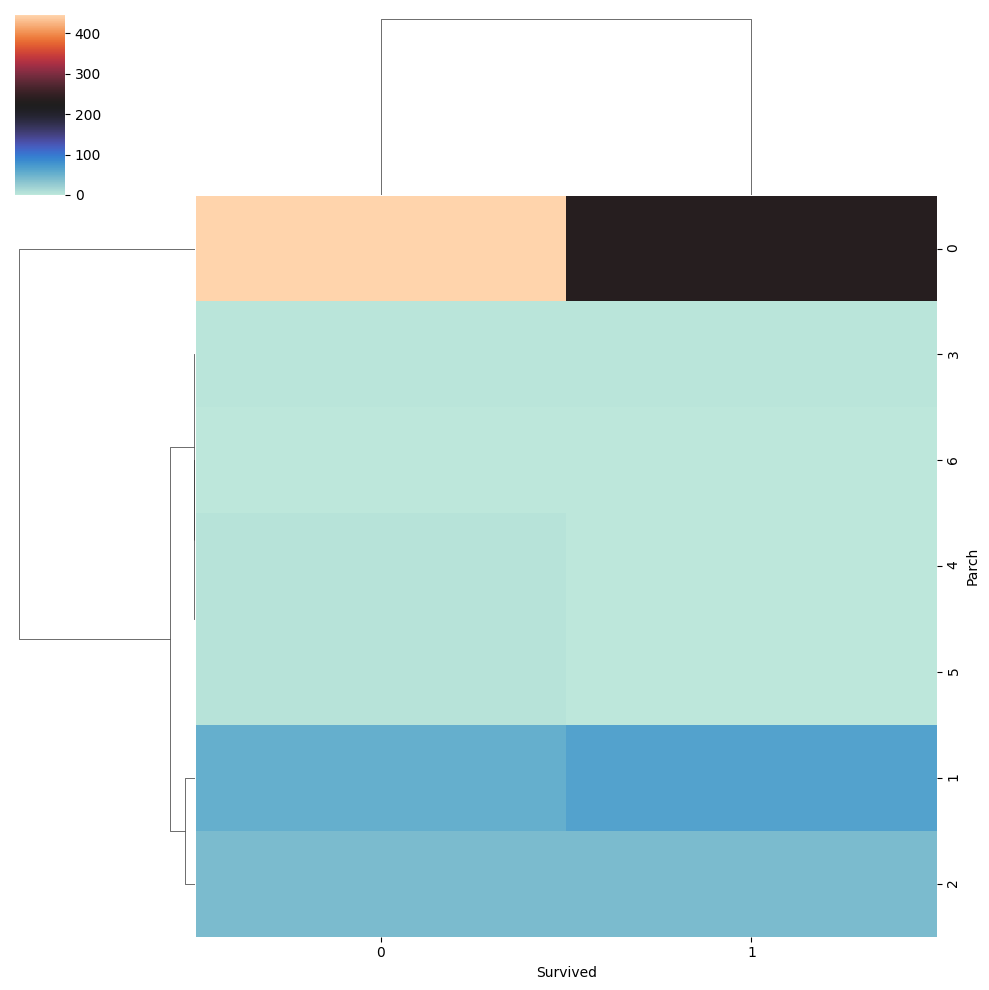

In [19]:
sns.clustermap(x,cmap = "icefire")

# 7) Pairplot (All Numerical Columns)

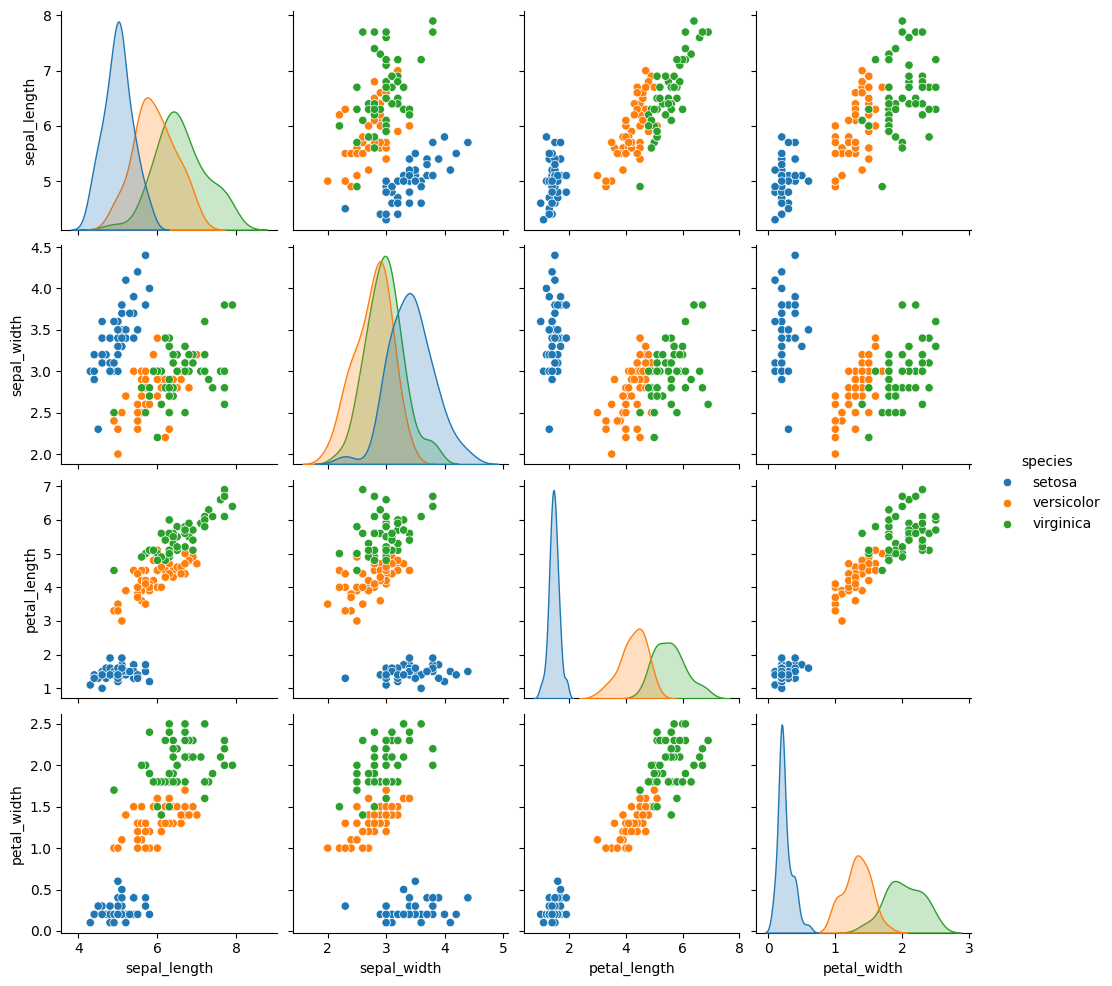

In [20]:
sns.pairplot(data = iris,hue = 'species')

# 8) Groupby (Numeric - Numeric)

In [24]:
new = flights.groupby('year').sum(numeric_only = True).reset_index()

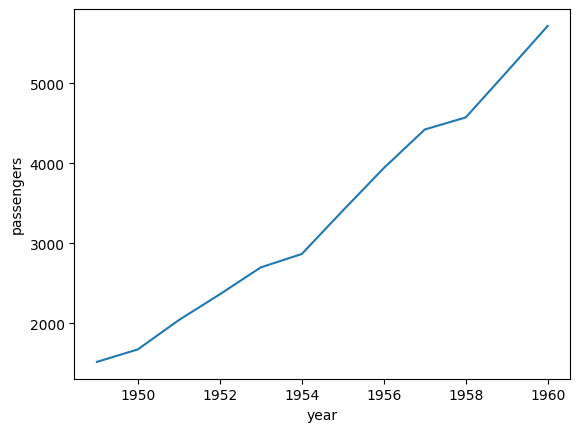

In [26]:
sns.lineplot(x = "year",y = 'passengers',data = new)
plt.show()

<Axes: xlabel='year', ylabel='month'>

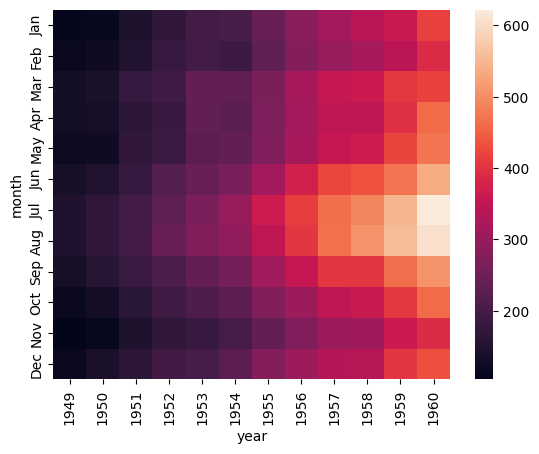

In [29]:
sns.heatmap(flights.pivot_table(values = 'passengers',index = 'month',columns = 'year',observed = False))

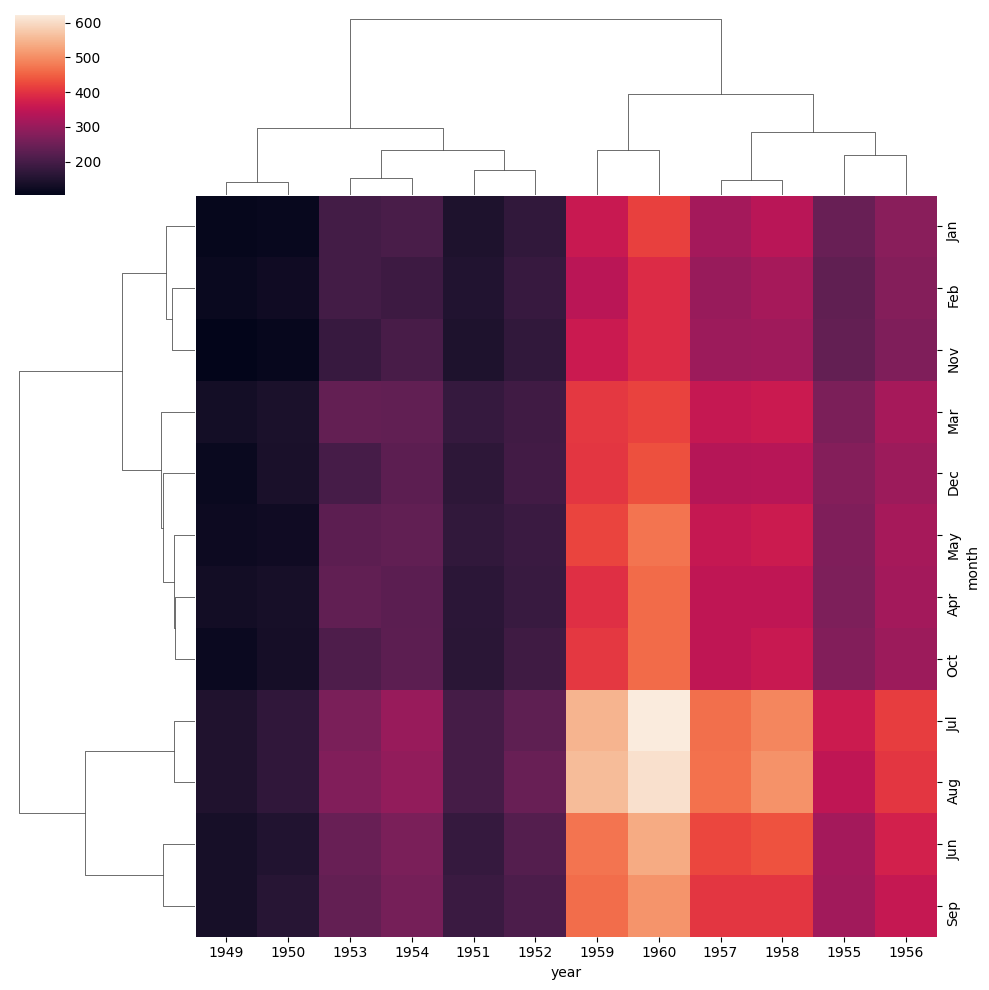

In [30]:
sns.clustermap(flights.pivot_table(values = 'passengers',index = 'month',columns = 'year',observed = False))